In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objects as gb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv('Mobile phone price.csv')
df.tail(5)

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price
402,Samsung,Galaxy Note20 5G,128,8,6.70,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.70,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.40,48+13+8+2,4025,429
406,Samsung,Galaxy S10 Lite,128,6,6.70,48+12+5,4500,649


In [3]:
df.columns = df.columns.str.strip()

In [4]:
df=df.drop_duplicates()
df=df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 405
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   381 non-null    object 
 1   Model                   381 non-null    object 
 2   Storage                 381 non-null    object 
 3   RAM                     381 non-null    object 
 4   Screen Size (inches)    381 non-null    float64
 5   Camera (MP)             381 non-null    object 
 6   Battery Capacity (mAh)  381 non-null    int64  
 7   Price                   381 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 26.8+ KB


In [5]:
df['Price']=df['Price'].str.replace('$','',regex=False)
df['Price']=df['Price'].str.replace(',','',regex=False).astype(float)

df['Storage']=df['Storage'].str.replace('GB','',regex=False).astype(int)


df['RAM']=df['RAM'].str.replace('GB','',regex=False).astype(int)

df['Screen Size (inches)']=df['Screen Size (inches)'].astype(float)

df['Battery Capacity (mAh)'] = df['Battery Capacity (mAh)'].astype(int)

In [6]:
def sum_camera_mp(camera_str):
    try:
        mp_values = [float(mp.strip().replace('MP', '')) for mp in camera_str.split('+')]
        return sum(mp_values)
    except:
        return np.nan

df['Camera (MP)'] = df['Camera (MP)'].apply(sum_camera_mp)

In [7]:
df = df.dropna()

In [8]:
# I think adding megapixels maybe misleading 
# for instance look at the 1st (iphone 13 pro and 3 redmi note 10 pro) double the megapixel but 3.5x less price
# even its obvious on the heatmap below so exclude the camera as a feature
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price
0,Apple,iPhone 13 Pro,128,6,6.10,36.0,3095,999.0
1,Samsung,Galaxy S21 Ultra,256,12,6.80,140.0,5000,1199.0
2,OnePlus,9 Pro,128,8,6.70,108.0,4500,899.0
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,79.0,5020,279.0
4,Google,Pixel 6,128,8,6.40,62.2,4614,799.0


In [9]:
df['Brand'] = df['Brand'].astype('category').cat.codes

In [10]:
df = df.drop(columns=['Model'])

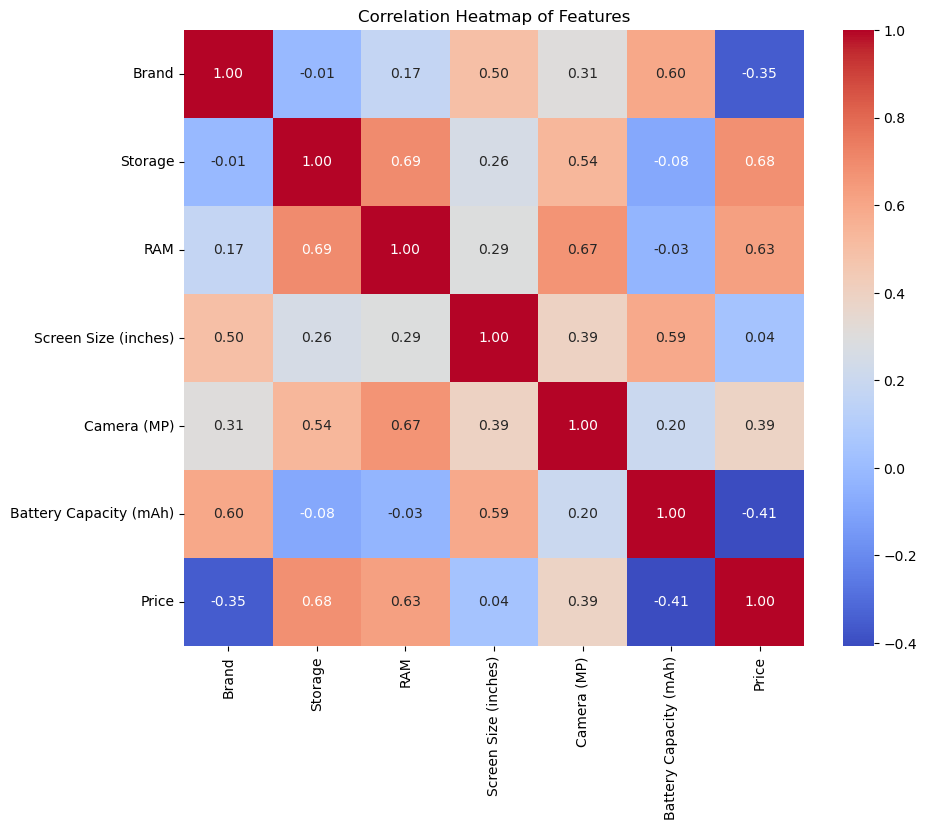

In [11]:
corr= df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

In [12]:
price_corr = corr['Price'].abs()
selected_features = price_corr[price_corr > 0.3].index.tolist()
selected_features.remove('Price')  
# brand and battery capacity are -ve relation so they're not suitable
# the camera is as i've stated above a bit misleading
# choose only storage and ram (both have ~65% correlation)
print("Selected features based on correlation with Price:", selected_features)

Selected features based on correlation with Price: ['Brand', 'Storage', 'RAM', 'Camera (MP)', 'Battery Capacity (mAh)']


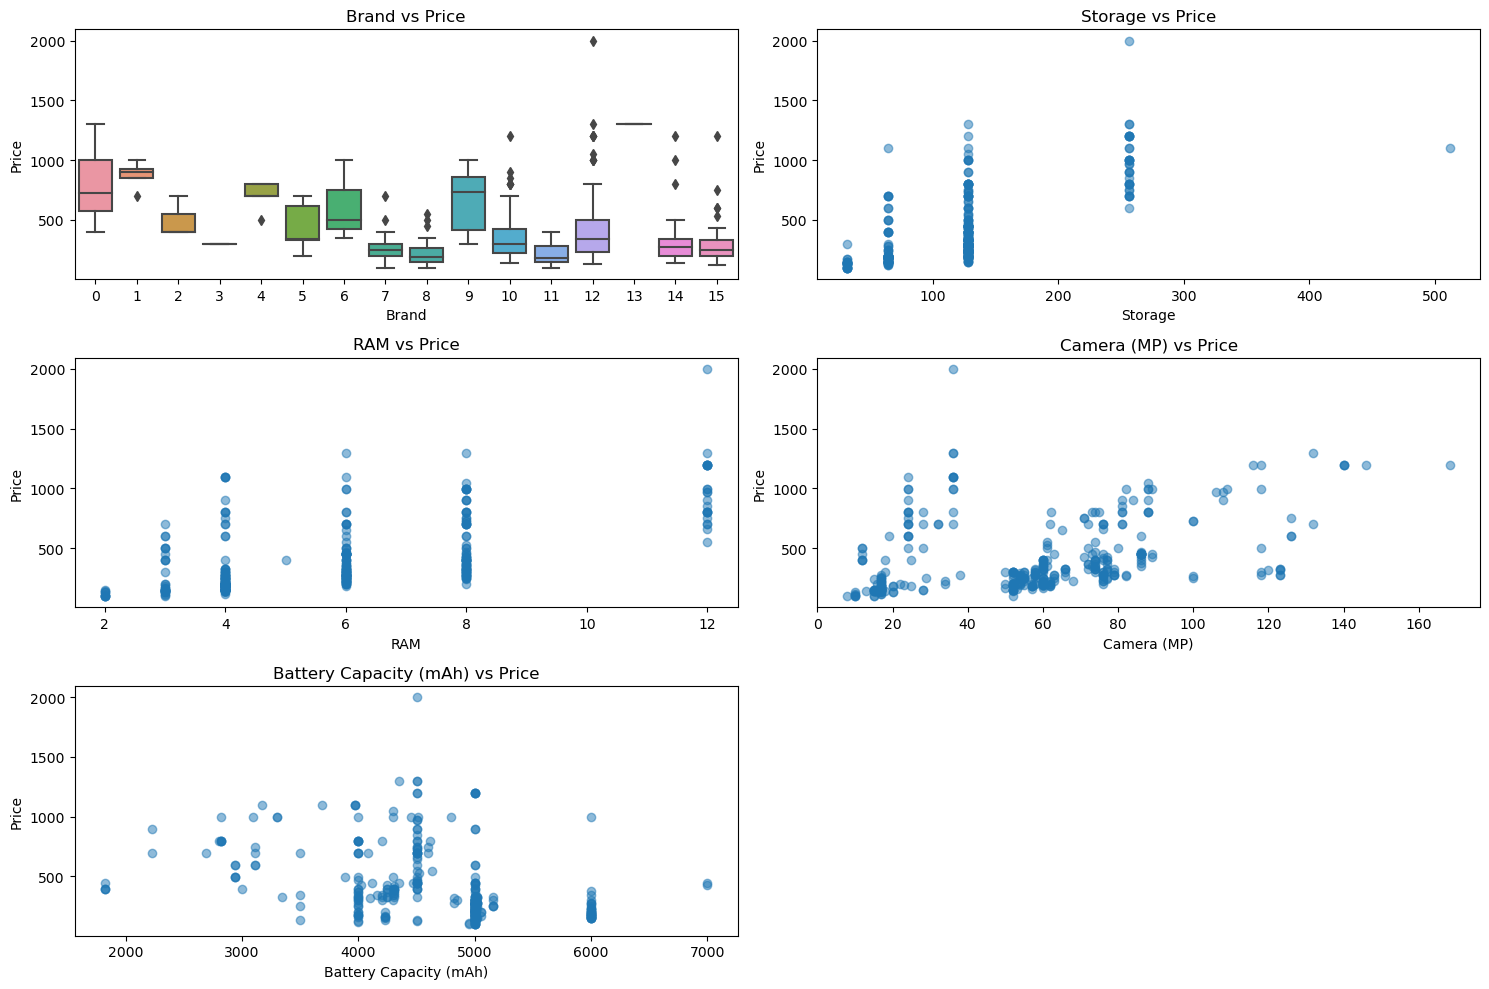

In [13]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot((len(selected_features) + 1) // 2, 2, i)  # Dynamic subplot grid
    if feature == 'Brand':  # Handle categorical feature with box plot
        sns.boxplot(x=df[feature], y=df['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(f'{feature} vs Price')
    else:  # Handle numerical features with scatter plot
        plt.scatter(df[feature], df['Price'], alpha=0.5)
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(f'{feature} vs Price')
    plt.tight_layout()

plt.savefig('features_vs_price.png')
plt.show()